In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import os
from sklearn.feature_selection import VarianceThreshold
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv("mizotext.csv")

In [3]:
df.head()

,Emotion,Text
0,neutral,tinge ?
1,joy,naktuk ka piancham ka va nghakhlel tak
2,sadness,ka thiannu ka va ral dawn mek ka va han lungga...
3,joy,it mitmeng chu ava mai tak em
4,fear,phone call pawimawh deuh ka nghak mek ka va ha...


In [4]:
df.shape

(5195, 2)

In [5]:
df['Emotion'].value_counts()

joy        1694
fear       1147
sadness    1081
anger       737
neutral     536
Name: Emotion, dtype: int64

In [6]:
emotion_list = df['Emotion'].unique().tolist()

In [7]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'anger']

In [8]:
df[df['Emotion'] == 'sadness']

,Emotion,Text
2,sadness,ka thiannu ka va ral dawn mek ka va han lungga...
5,sadness,ka hmu leh tawh dawn lo hi k va han lunngai t...
7,sadness,mite chuan an nantna te chu an hlimna derin an...
11,sadness,ka thiannu kawi chu ava to tak em
12,sadness,ka rawn haw meuh chuan ka in chu a lo danglam ...
...,...,...
5168,sadness,ti thei hlauh se aw
5173,sadness,ka hmangaihte ka kalsan a ngai dawn anih hi
5174,sadness,khawnge a awm deih le aw ka hmu zo miah lo
5178,sadness,mahni hi ka inring thei thlawt lo


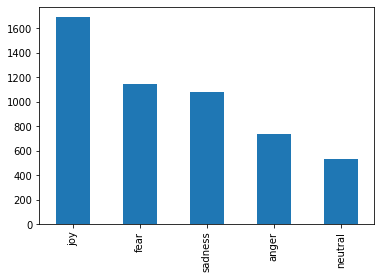

In [9]:
df['Emotion'].value_counts().plot(kind='bar')
plt.savefig("plot.png", dpi=500)

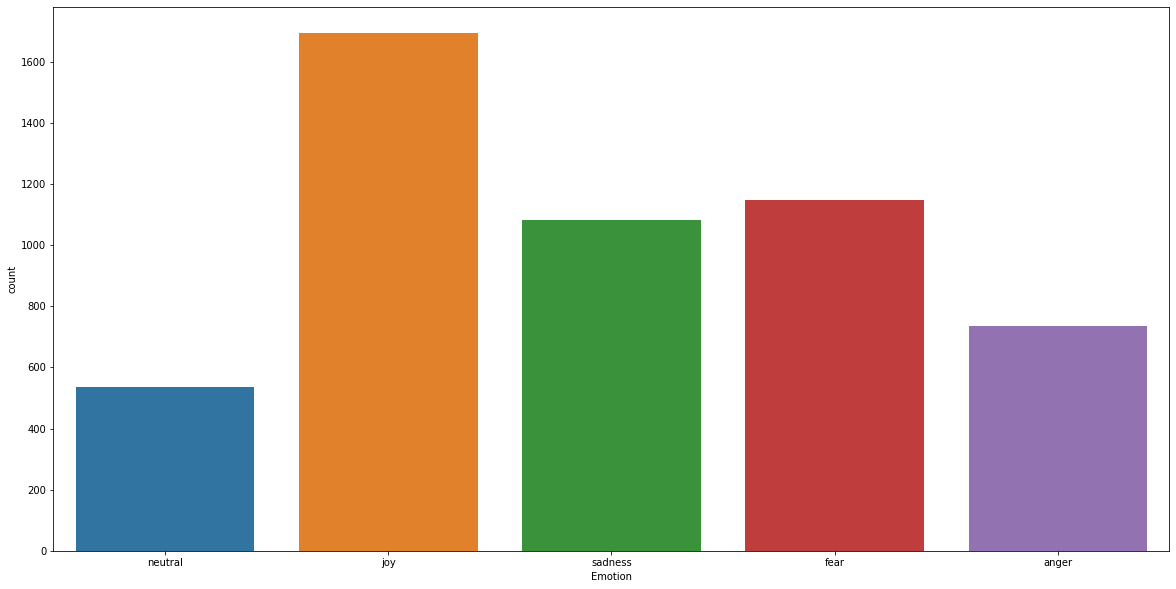

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()
plt.savefig("plot2.png", dpi=500)

In [11]:
X = df['Text']
y = df['Emotion']

## TRAIN TEST SPLIT

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=48)

### COUNT  VECTORIZATION

In [13]:
stop_words = ['',' ',' ','!','! ','!  ','! !','! ! ','! ! !','?','e','ve','ka','kan','i','.']

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=2, ngram_range=(1, 3), encoding='ISCII',stop_words=stop_words)
vectorizer.fit(iter(X_train))
Xtr = vectorizer.transform(iter(X_train))
Xte = vectorizer.transform(iter(X_test))
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
Ytr = encoder.transform(y_train)
Yte = encoder.transform(y_test)

In [14]:
print(len(vectorizer.get_feature_names())) 

9539


In [15]:
vectorizer.get_feature_names() 

['32',
 '32 nia',
 'accident',
 'accident teuh',
 'accident teuh vele',
 'add',
 'add theilo',
 'add theilo che',
 'ah',
 'ah an',
 'ah aw',
 'ah awm',
 'ah awm mek',
 'ah awm nimai',
 'ah basketball',
 'ah basketball khel',
 'ah chesual',
 'ah chesual damdawi',
 'ah hian',
 'ah hlau',
 'ah hlau miah',
 'ah hlim',
 'ah in',
 'ah in entir',
 'ah kal',
 'ah kal dawn',
 'ah khan',
 'ah khan awm',
 'ah lam',
 'ah lam ang',
 'ah lawm',
 'ah lawm lutuk',
 'ah leng',
 'ah leng chhuak',
 'ah let',
 'ah let leh',
 'ah min',
 'ah nu',
 'ah nu in',
 'ah pawh',
 'ah pawh hahchawl',
 'ah pawh hriat',
 'ah rawn',
 'ah rawn hman',
 'ah rawn thleng',
 'ah rilru',
 'ah rilru lam',
 'ah sawi',
 'ah sawi fel',
 'ah tho',
 'ah tho ang',
 'ah ting',
 'ah ting em',
 'ah tling',
 'ai',
 'aia',
 'aiia',
 'aiia chaklo',
 'aiia chaklo zawkte',
 'aiin',
 'aizawl',
 'aizawl ava',
 'aizawl ava ang',
 'ala',
 'ala ni',
 'alaw',
 'alawm',
 'alawm awm',
 'alawm awm khawp',
 'alawm hei',
 'alawm hmela',
 'alawm hmela 

#### Multinomial Naive Bayes

              precision    recall  f1-score   support

       anger       0.91      0.84      0.87        81
        fear       0.71      0.75      0.72       106
         joy       0.72      0.91      0.80       175
     neutral       1.00      0.39      0.56        51
     sadness       0.70      0.60      0.65       107

    accuracy                           0.75       520
   macro avg       0.81      0.70      0.72       520
weighted avg       0.77      0.75      0.74       520

Accuracy: 75.0


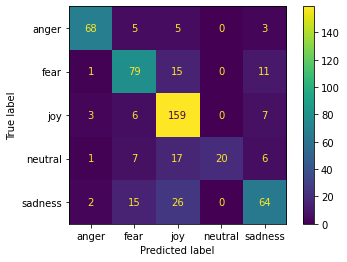

In [16]:
nb = MultinomialNB()
nb.fit(Xtr, Ytr)
pred = nb.predict(Xte)
print(classification_report( Yte, pred, target_names=encoder.classes_))
plot_confusion_matrix(nb,Xte,Yte,display_labels=encoder.classes_)
print("Accuracy:",metrics.accuracy_score(Yte,pred)*100)
plt.savefig("nb.png", dpi=500)

#### Decision tree

              precision    recall  f1-score   support

       anger       0.88      0.84      0.86        81
        fear       0.83      0.83      0.83       106
         joy       0.92      0.85      0.88       175
     neutral       0.58      0.86      0.69        51
     sadness       0.70      0.65      0.68       107

    accuracy                           0.80       520
   macro avg       0.78      0.81      0.79       520
weighted avg       0.82      0.80      0.81       520

Accuracy: 80.38461538461539


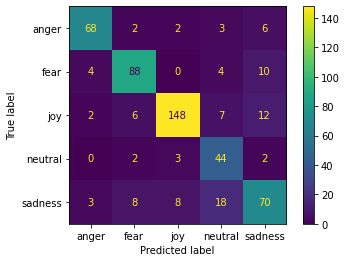

In [17]:
dt = DecisionTreeClassifier()
dt.fit(Xtr, Ytr)
pred = dt.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))
plot_confusion_matrix(dt,Xte,Yte,display_labels=encoder.classes_)
print("Accuracy:",metrics.accuracy_score(Yte,pred)*100)
plt.savefig("dt.png", dpi=500)

#### Random forest

              precision    recall  f1-score   support

       anger       0.91      0.88      0.89        81
        fear       0.89      0.82      0.85       106
         joy       0.84      0.93      0.88       175
     neutral       0.63      0.86      0.73        51
     sadness       0.83      0.63      0.71       107

    accuracy                           0.83       520
   macro avg       0.82      0.82      0.81       520
weighted avg       0.84      0.83      0.83       520

Accuracy: 82.88461538461539


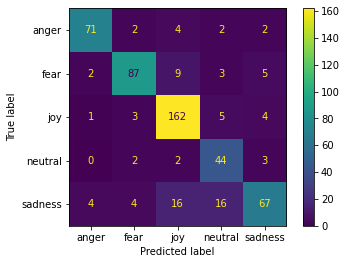

In [18]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(Xtr, Ytr)
pred = rf.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))
plot_confusion_matrix(rf,Xte,Yte,display_labels=encoder.classes_)
print("Accuracy:",metrics.accuracy_score(Yte,pred)*100)
plt.savefig("rf.png", dpi=500)

#### Support Vector Classification

              precision    recall  f1-score   support

       anger       0.95      0.89      0.92        81
        fear       0.86      0.81      0.83       106
         joy       0.92      0.93      0.92       175
     neutral       0.66      0.92      0.77        51
     sadness       0.75      0.67      0.71       107

    accuracy                           0.84       520
   macro avg       0.83      0.84      0.83       520
weighted avg       0.85      0.84      0.84       520

Accuracy: 84.42307692307692


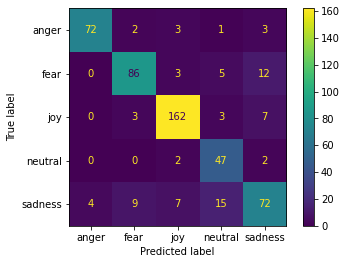

In [19]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(Xtr, Ytr)
pred = svc.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))
plot_confusion_matrix(svc,Xte,Yte,display_labels=encoder.classes_)
print("Accuracy:",metrics.accuracy_score(Yte,pred)*100)
plt.savefig("svm.png", dpi=500)

#### Logistic regression


              precision    recall  f1-score   support

       anger       0.97      0.88      0.92        81
        fear       0.88      0.82      0.85       106
         joy       0.88      0.94      0.91       175
     neutral       0.67      0.86      0.75        51
     sadness       0.76      0.67      0.71       107

    accuracy                           0.84       520
   macro avg       0.83      0.84      0.83       520
weighted avg       0.85      0.84      0.84       520

Accuracy: 84.42307692307692


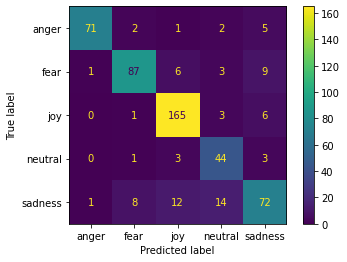

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtr, Ytr)
pred = lr.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))
plot_confusion_matrix(lr,Xte,Yte,display_labels=encoder.classes_)
print("Accuracy:",metrics.accuracy_score(Yte,pred)*100)
plt.savefig("lr.png", dpi=500)

In [22]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [23]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer(min_df=2, ngram_range=(1, 3), encoding='ISCII',stop_words=stop_words)),('lr',LogisticRegression())])


In [24]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('cv',
                 CountVectorizer(encoding='ISCII', min_df=2, ngram_range=(1, 3),
                                 stop_words=['', ' ', ' ', '!', '! ', '!  ',
                                             '! !', '! ! ', '! ! !', '?', 'e',
                                             've', 'ka', 'kan', 'i', '.'])),
                ('lr', LogisticRegression())])

In [25]:
ex1 = "i va lungngai ve a"

In [26]:
pipe_lr.predict([ex1])

array(['sadness'], dtype=object)

In [27]:
import eli5
eli5.show_weights(pipe_lr,top=20)

In [29]:
# Save Model & Pipeline
import joblib
pipeline_file = open("Mizo_emotion_classifier.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()